## Creating a scene with Ball and Plane (show plane, background, camera pose) 

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


pybullet build time: May 20 2022 19:44:17


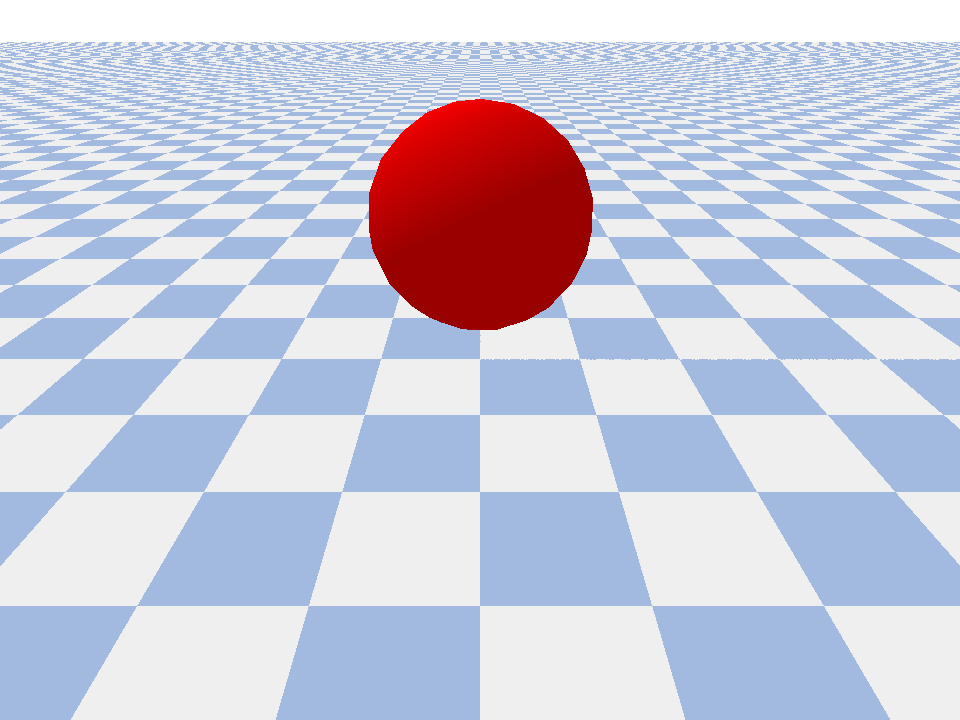

In [1]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

# create a scene
scene = pbs.Scene()

# define a position and create a sphere
position = np.array([0, -2, 2])
sphere = pbs.make_sphere(position, [1,1,1]) 

# add the sphere to the scene
scene.add_body(sphere)
image,depth, segm= scene.render(pbs.pybullet_render) 
image



## Creating a scene with custom mesh (custom mesh)

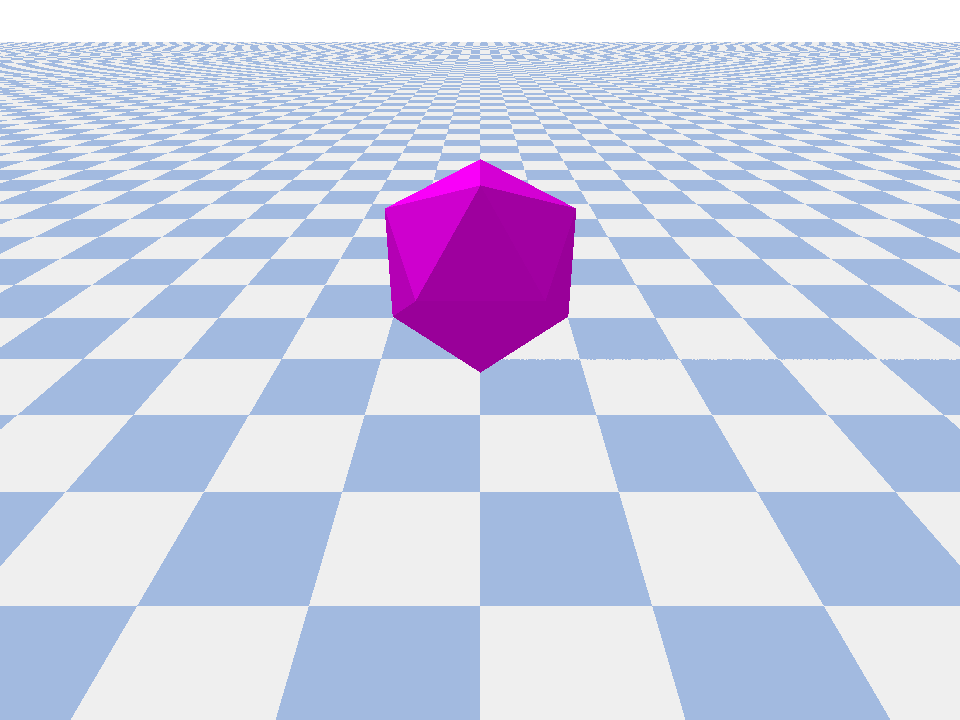

In [6]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

path_to_mesh = "../assets/sample_objs/icosahedron.obj"

# create a scene
scene = pbs.Scene()

# define a pose and create a sphere
d20_pose = np.eye(4)
d20_rot = np.array([[0, 0, 1], [0, 1, 0], [-1, 0, 0]])
d20_pos = np.array([0, 0, 1])
d20_pose[:3,:3] = d20_rot
d20_pose[:3,3] = d20_pos

# create a d20
d20 = pbs.make_body_from_obj_pose(path_to_mesh, d20_pose, id = "d20")
d20.set_color([1,0,1])
scene.add_body(d20)
image, depth, segm = scene.render(pbs.pybullet_render)
image

## Render Depth

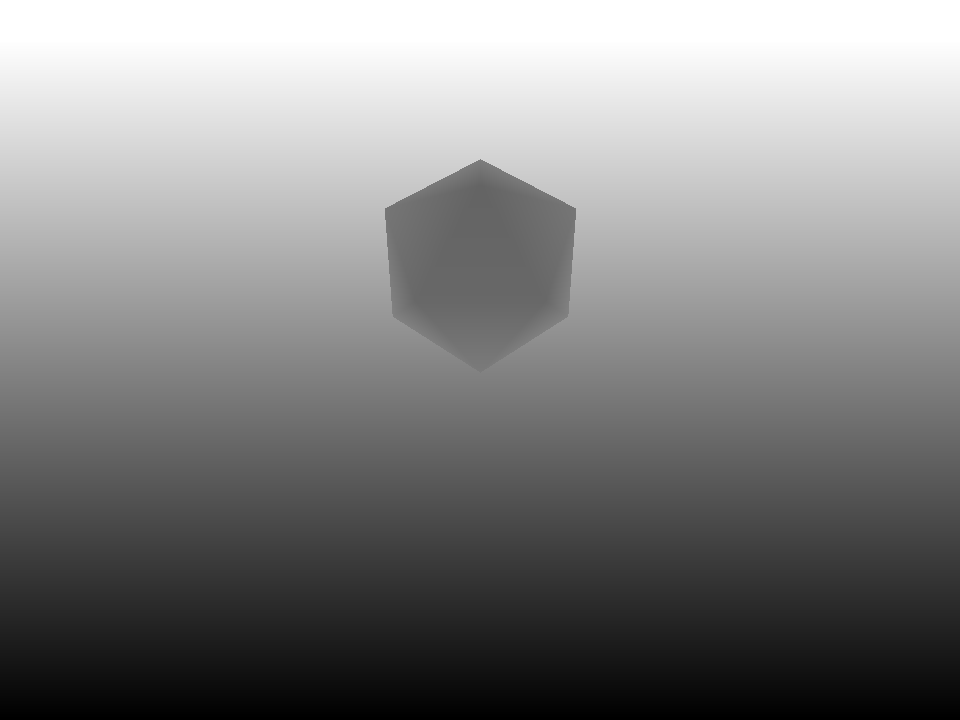

In [7]:
depth

/tmp/ipykernel_9817/1586457943.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', num_classes)


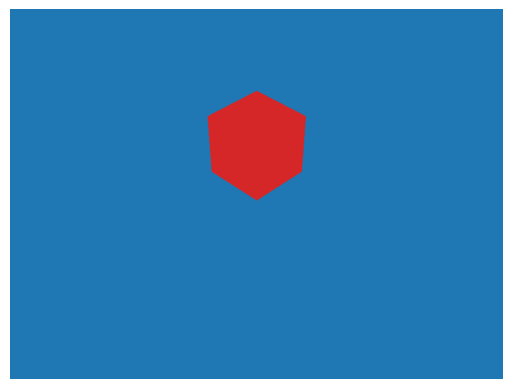

In [8]:
import matplotlib.pyplot as plt

class_array = segm
# Create a colormap for the number of classes
# num_classes = np.max(class_array) + 1
num_classes = 4
cmap = plt.cm.get_cmap('tab10', num_classes)

# Create an RGB image based on the class array and colormap
class_image = cmap(class_array)
class_image = (class_image[:, :, :3] * 255).astype(np.uint8)

# Display the class image
plt.imshow(class_image)
plt.axis('off')
plt.show()

## Adjusting mesh scaling

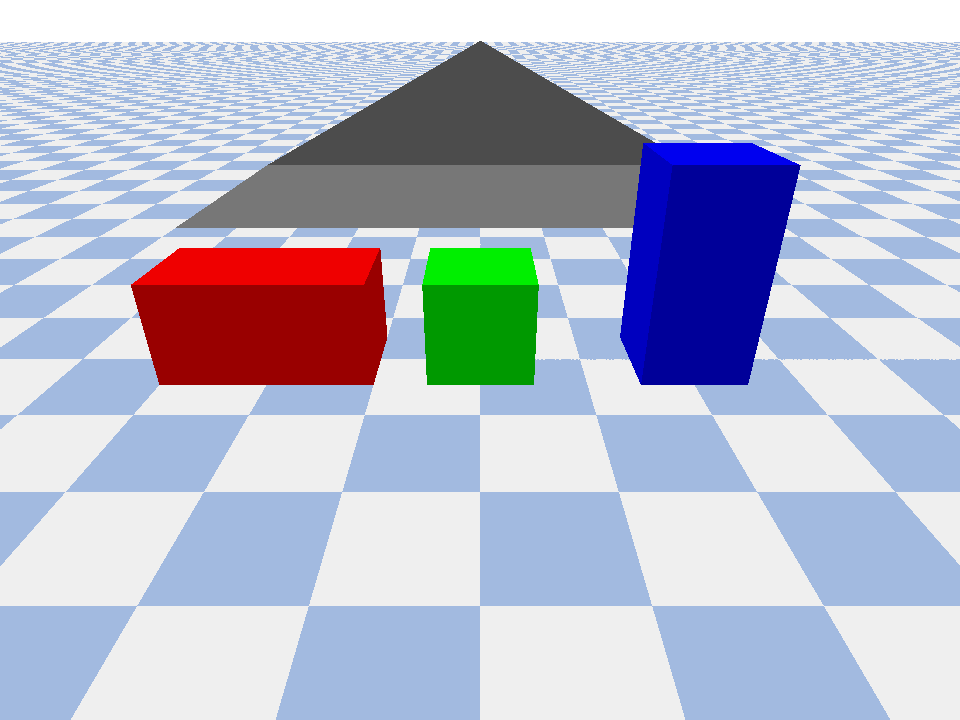

In [9]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

# default cube, length 1 at origin 
original_cube = pbs.make_box(np.array([0,0,0.5]), id="original_cube")
original_cube.set_color([0,1,0])

# wide box, set scale after construction 
second_cube = pbs.make_box(np.array([-2,0,0.5]), id="second_cube")
second_cube.set_color([1,0,0])
second_cube.set_scale(np.array([2,1,1]))

# tall box, can set scale at construction
third_cube = pbs.make_box(np.array([2,0,1]), np.array([1,1,2]), id="third_cube")
third_cube.set_color([0,0,1])

# custom obj, large scale 
diamond = pbs.make_body_from_obj("../assets/sample_objs/pyramid.obj", np.array([0,2,2]), id="diamond")
diamond.set_scale(np.array([6,3,1]))
diamond.set_color([.5,.5,.5])

# add all bodies to scene
scene.add_body(original_cube)
scene.add_body(second_cube)
scene.add_body(third_cube)
scene.add_body(diamond)

# could also have added all at once 
# scene.add_bodies([original_cube, second_cube, third_cube, diamond])

image, depth, segm = scene.render(pbs.pybullet_render)
image


## Render with Kubric 

added occluder


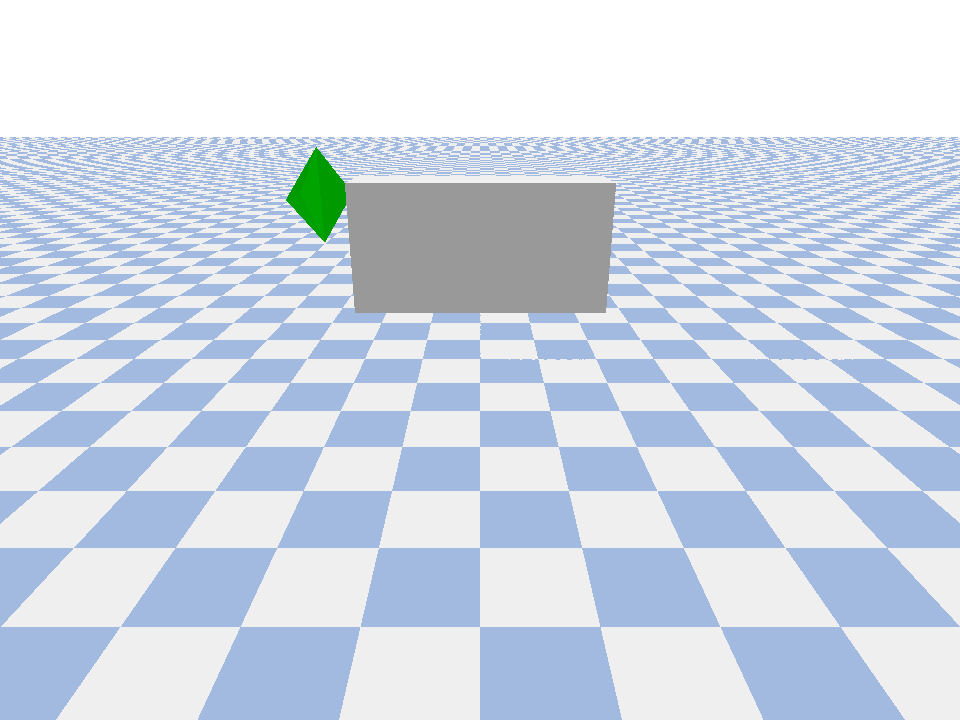

In [3]:
import bayes3d.utils.pybullet_sim as pbs
import bayes3d as b
import numpy as np 
from PIL import Image as im 

# try rendering simple scene 

scene = pbs.Scene() 

path_to_obj = "../assets/sample_objs/diamond.obj" 
position = np.array([-4,6,2])
diamond = pbs.make_body_from_obj(path_to_obj, position,  id="diamond")
diamond.set_color(np.array([0,1,0]))
diamond.set_scale(np.array([3,3,3]))
diamond.set_velocity(np.array([30,0,0]))
scene.add_body(diamond)

wall = pbs.make_box([0,0,2], [4,1,2], id = "wall")
wall.set_color(np.array([1,1,0]))
wall.set_occluder(True)
scene.add_body(wall)

scene.set_camera_position_target([0,-10,4], [0,0,0])

pyb = scene.simulate(12)
pyb.create_gif('scene_gifs/kub_occlu.gif')
rgb = pyb.frames[0]

# preview image 
prev = im.fromarray(rgb)
prev

In [4]:
# obtain default intrinsics, hardcoded for now 
intriniscs = b.Intrinsics(720, 960, 500.0, 500.0, 320.0, 240.0, 0.1, 100.0)

# obtain filepaths for render_many 
filepath_occ = '/home/ubuntu/bayes3d/assets/sample_objs/cube.obj'
filepath_diamond = '/home/ubuntu/bayes3d/assets/sample_objs/diamond.obj'
filepaths = [filepath_occ, filepath_diamond]
print(filepaths)

# create poses for render_many 
poses = pyb.get_body_poses() 
wall_poses = np.array(poses['wall'])
diamond_poses = np.array(poses['diamond'])
poses = np.stack((wall_poses, diamond_poses), axis = 1) 
print(poses.shape)

def get_camera_pose(view_matrix):
    # cam2world
    world2cam = np.array(view_matrix)
    cam2world  = np.linalg.inv(world2cam)
    return cam2world
# camera pose 
cam_pose = get_camera_pose(np.reshape(np.array(pyb.viewMatrix), (4,4)).T )
print(cam_pose)

mesh_scaling = [wall.scale, diamond.scale]
mesh_colors = [wall.color, diamond.color]

['/home/ubuntu/bayes3d/assets/sample_objs/cube.obj', '/home/ubuntu/bayes3d/assets/sample_objs/diamond.obj']
(12, 2, 4, 4)
[[ 1.00000006  0.          0.          0.        ]
 [-0.          0.3713907  -0.9284767  -9.99999985]
 [ 0.          0.92847676  0.37139067  4.00000007]
 [ 0.          0.          0.          1.        ]]


cy is not equal to height/2!
cy is not equal to height/2!
path:
/home/ubuntu/bayes3d/bayes3d/_rendering
sudo docker run --rm --interactive --user $(id -u):$(id -g) --volume /home/ubuntu/bayes3d/bayes3d/_rendering:/home/ubuntu/bayes3d/bayes3d/_rendering --volume /tmp:/tmp   --volume /home/ubuntu/bayes3d/assets/sample_objs:/home/ubuntu/bayes3d/assets/sample_objs  --volume /home/ubuntu/bayes3d/assets/sample_objs:/home/ubuntu/bayes3d/assets/sample_objs  kubricdockerhub/kubruntu /usr/bin/python3 /home/ubuntu/bayes3d/bayes3d/_rendering/photorealistic_renderers/_kubric_exec_parallel.py
<FlatMaterial background=False color=Color(r=1, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>
<FlatMaterial.001 background=False color=Color(r=0, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>


INFO:kubric.renderer.blender:Using scratch rendering folder: '/tmp/tmpa41pv9wa'
INFO:kubric.renderer.blender:Rendered frame '/tmp/tmpa41pv9wa/images/frame_0001.png'


<FlatMaterial.002 background=False color=Color(r=1, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>
<FlatMaterial.003 background=False color=Color(r=0, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>


INFO:kubric.renderer.blender:Using scratch rendering folder: '/tmp/tmpn4o4n9kl'
INFO:kubric.renderer.blender:Rendered frame '/tmp/tmpn4o4n9kl/images/frame_0001.png'


<FlatMaterial.004 background=False color=Color(r=1, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>
<FlatMaterial.005 background=False color=Color(r=0, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>


INFO:kubric.renderer.blender:Using scratch rendering folder: '/tmp/tmpsef6btpn'
INFO:kubric.renderer.blender:Rendered frame '/tmp/tmpsef6btpn/images/frame_0001.png'


<FlatMaterial.006 background=False color=Color(r=1, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>
<FlatMaterial.007 background=False color=Color(r=0, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>


INFO:kubric.renderer.blender:Using scratch rendering folder: '/tmp/tmp80341nsp'
INFO:kubric.renderer.blender:Rendered frame '/tmp/tmp80341nsp/images/frame_0001.png'


<FlatMaterial.008 background=False color=Color(r=1, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>
<FlatMaterial.009 background=False color=Color(r=0, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>


INFO:kubric.renderer.blender:Using scratch rendering folder: '/tmp/tmpxt38mx0p'
INFO:kubric.renderer.blender:Rendered frame '/tmp/tmpxt38mx0p/images/frame_0001.png'


<FlatMaterial.010 background=False color=Color(r=1, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>
<FlatMaterial.011 background=False color=Color(r=0, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>


INFO:kubric.renderer.blender:Using scratch rendering folder: '/tmp/tmprkj8g0hn'
INFO:kubric.renderer.blender:Rendered frame '/tmp/tmprkj8g0hn/images/frame_0001.png'


<FlatMaterial.012 background=False color=Color(r=1, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>
<FlatMaterial.013 background=False color=Color(r=0, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>


INFO:kubric.renderer.blender:Using scratch rendering folder: '/tmp/tmpq0d78xqi'
INFO:kubric.renderer.blender:Rendered frame '/tmp/tmpq0d78xqi/images/frame_0001.png'


<FlatMaterial.014 background=False color=Color(r=1, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>
<FlatMaterial.015 background=False color=Color(r=0, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>


INFO:kubric.renderer.blender:Using scratch rendering folder: '/tmp/tmpt8lwdmti'
INFO:kubric.renderer.blender:Rendered frame '/tmp/tmpt8lwdmti/images/frame_0001.png'


<FlatMaterial.016 background=False color=Color(r=1, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>
<FlatMaterial.017 background=False color=Color(r=0, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>


INFO:kubric.renderer.blender:Using scratch rendering folder: '/tmp/tmp5t4sr4li'
INFO:kubric.renderer.blender:Rendered frame '/tmp/tmp5t4sr4li/images/frame_0001.png'


<FlatMaterial.018 background=False color=Color(r=1, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>
<FlatMaterial.019 background=False color=Color(r=0, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>


INFO:kubric.renderer.blender:Using scratch rendering folder: '/tmp/tmpaplhezs3'
INFO:kubric.renderer.blender:Rendered frame '/tmp/tmpaplhezs3/images/frame_0001.png'


<FlatMaterial.020 background=False color=Color(r=1, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>
<FlatMaterial.021 background=False color=Color(r=0, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>


INFO:kubric.renderer.blender:Using scratch rendering folder: '/tmp/tmpmednl1g3'
INFO:kubric.renderer.blender:Rendered frame '/tmp/tmpmednl1g3/images/frame_0001.png'


<FlatMaterial.022 background=False color=Color(r=1, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>
<FlatMaterial.023 background=False color=Color(r=0, g=1, b=0, a=1.0) holdout=False indirect_visibility=True metadata={} name='FlatMaterial'>


INFO:kubric.renderer.blender:Using scratch rendering folder: '/tmp/tmpcja517qk'
INFO:kubric.renderer.blender:Rendered frame '/tmp/tmpcja517qk/images/frame_0001.png'


Error: Not freed memory blocks: 12, total unfreed memory 0.015106 MB


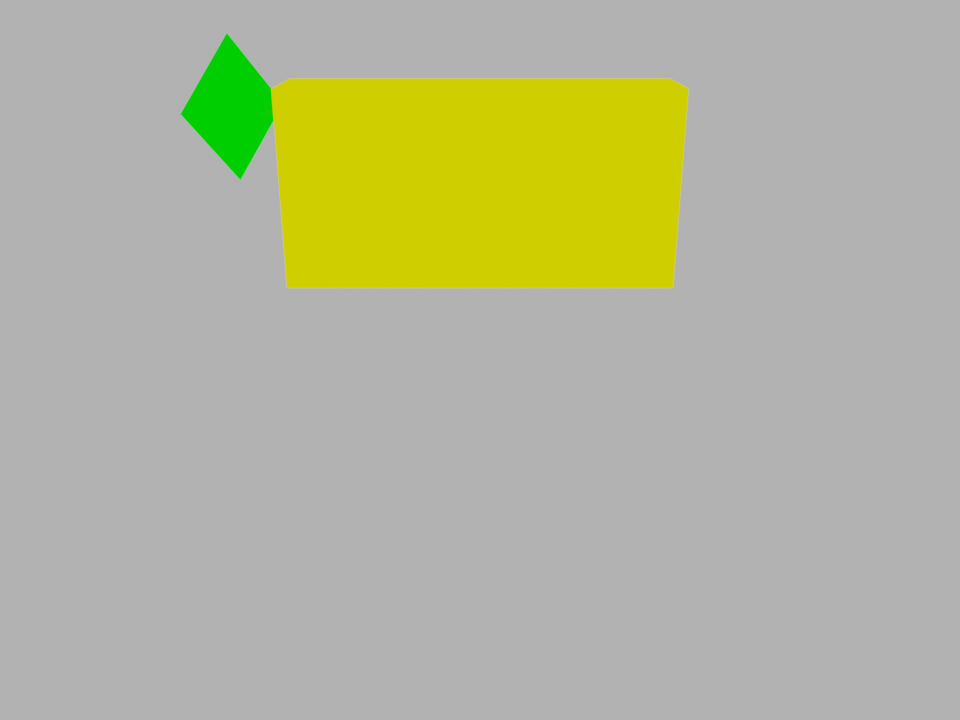

In [5]:
# render simple scene with render_many 
from bayes3d._rendering.photorealistic_renderers.kubric_interface import render_many
outputs = render_many(filepaths, poses, intriniscs, mesh_scales = mesh_scaling, mesh_colors = mesh_colors, scaling_factor=1, camera_pose = cam_pose)
image = b.get_rgb_image(outputs[0].rgb)
image


In [6]:
# test for longer scene 
images = [b.get_rgb_image(outputs[i].rgb) for i in range(len(outputs))]
output_path = "scene_gifs/kub_output.gif"

# Save the images as a GIF
images[0].save(output_path,
               save_all=True, append_images=images[1:], optimize=False, duration=1000*(1/15), loop=0)

## Adjusting Orientations 

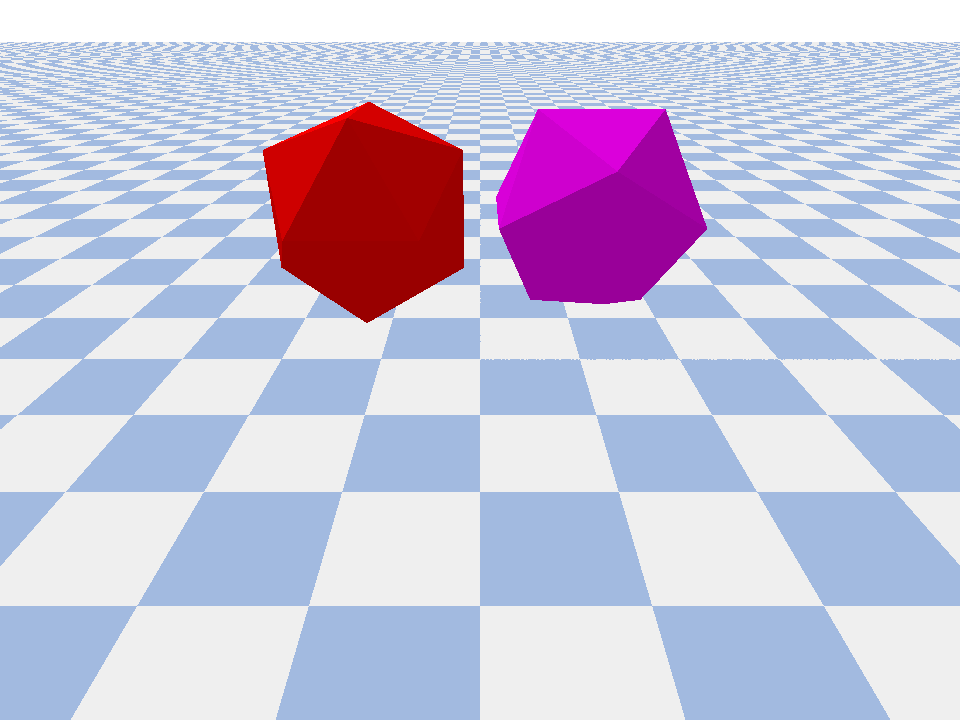

In [11]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

path_to_mesh = "../assets/sample_objs/icosahedron.obj"

# create scene and positions 
scene = pbs.Scene()
d20_position = np.array([1, 0, 1.5])   
rotated_position = np.array([-1, 0, 1.5]) 
d20 = pbs.make_body_from_obj(path_to_mesh, d20_position, id = "d20")

# create a rotated d20
rotated = pbs.make_body_from_obj(path_to_mesh, rotated_position, id = "rotated")

# define the rotation matrix 
sample_rotation = np.array([[0, 0, 1], [0, 1, 0], [-1, 0, 0]])
rotated.set_orientation(sample_rotation)

d20.set_color([1,0,1])
scene.add_bodies([d20, rotated])
image, depth, segm = scene.render(pbs.pybullet_render)
image


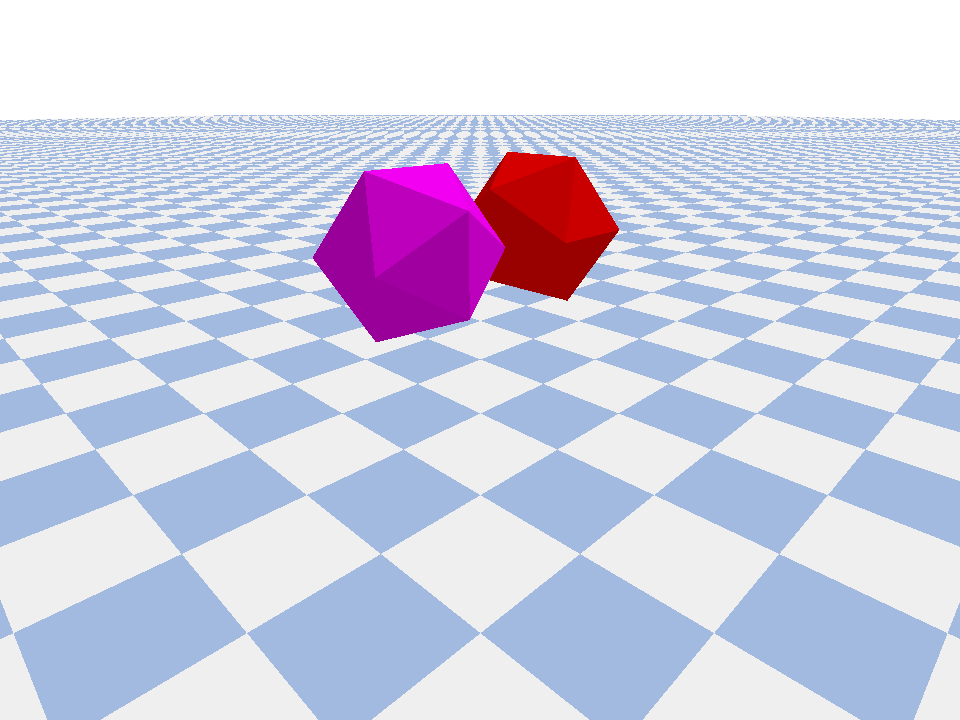

In [12]:
# new camera position
camera_position = np.array([5, 5, 3])
camera_target = np.array([0, 0, 0])
scene.set_camera_position_target(camera_position, camera_target)
image, depth, segm = scene.render(pbs.pybullet_render)
image

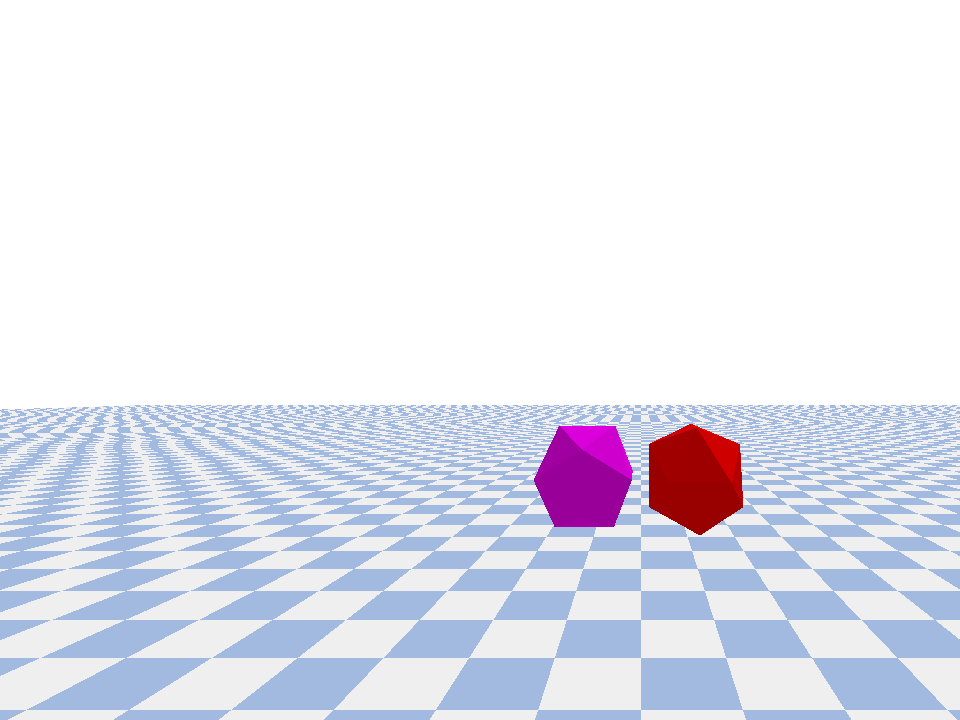

In [14]:
# New Camera Pose 
camera_pose = np.eye(4)

#camera facing downwards 
camera_position = np.array([0, -10, 3])
camera_pose[:3,3] = camera_position
camera_orientation = np.array([[ -1.,0.,0.],
                               [0.,0.28734789,0.95782629],
                               [ 0.,-0.95782629,0.28734789]])
camera_pose[:3,:3] = camera_orientation

scene.set_camera_pose(camera_pose)
image, depth, segm = scene.render(pbs.pybullet_render)
image

## Simple Simulation: Balls colliding (simulation, pybullet class, object poses)

In [16]:
import bayes3d.utils.pybullet_sim as pbs

# define scene and scene gravity, zero gravity by default
scene = pbs.Scene()
scene.set_gravity([0,0,-10])

# create spheres 
sphere_position1 = [-1, 0, 1]
sphere_start_velocity1 = [5, 0, 0]
sphere_position2 = [1, 0, 1]
sphere_start_velocity2 = [-5, 0, 0]
sphere1 = pbs.make_sphere(sphere_position1, 0.5,id = "sphere1")
sphere1.set_velocity(sphere_start_velocity1)
sphere1.set_color([0,1,1])
sphere2 = pbs.make_sphere(sphere_position2, 0.5, "sphere2")
sphere2.set_velocity(sphere_start_velocity2)

# add spheres
scene.add_bodies([sphere1, sphere2])

# simulate for 100 steps, which returns a PyBulletSim object
pyb_sim = scene.simulate(100) 

# create a gif from the simulation
pyb_sim.create_gif("scene_gifs/sphere_collision.gif", 50)

In [17]:
# use pose information for other visualizers 
pyb_sim.get_body_poses()

{'sphere1': [array([[ 1.,  0.,  0., -1.],
         [ 0.,  1.,  0.,  0.],
         [ 0.,  0.,  1.,  1.],
         [ 0.,  0.,  0.,  1.]]),
  array([[ 1.        ,  0.        ,  0.        , -0.91666667],
         [ 0.        ,  1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  1.        ,  0.99722222],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  array([[ 1.        ,  0.        ,  0.        , -0.83333333],
         [ 0.        ,  1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  1.        ,  0.99166667],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  array([[ 1.        ,  0.        ,  0.        , -0.75      ],
         [ 0.        ,  1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  1.        ,  0.98333333],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  array([[ 1.        ,  0.        ,  0.        , -0.66666667],
         [ 0.        ,  1.        ,  0

In [18]:
pyb_sim.create_seg_gif("scene_gifs/sphere_seg.gif", 50)

## Simulation: Balls Bouncing (restitution, gravity) 

In [2]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

#create spheres of varying restitution
sphere1 = pbs.make_sphere(np.array([0, 0, 3]), 0.5, id = "regular_ball")
sphere1.set_color([1,0,0])
sphere1.set_restitution(0.6)
sphere1.set_velocity([0,0,-2])

sphere2 = pbs.make_sphere(np.array([2, 0, 3]), 0.5, id = "bouncy_ball")
sphere2.set_color([0,1,0])
sphere2.set_restitution(1)
sphere2.set_velocity([0,0,-2])

sphere3 = pbs.make_sphere(np.array([-2, 0, 3]), 0.5, id = "flat_ball")
sphere3.set_color([0,0,1])
sphere3.set_restitution(0)
sphere3.set_velocity([0,0,-2])

scene.add_bodies([sphere1, sphere2, sphere3])

# Can set scene gravity 
scene.set_gravity([0,0,-10])

# Can set fps of gif 
pyb_sim = scene.simulate(120)
pyb_sim.create_gif("scene_gifs/restitution.gif", 50)

## Simulation: Balls Rolling (friction, damping)

In [3]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene() 
path_to_d20 = "../assets/sample_objs/icosahedron.obj"

x = -4

# create spheres of varying friction
sphere = pbs.make_sphere(np.array([x,0,1]), scale = [1,1,1], id = "regular_sphere", friction = 1, velocity = [10,0,0])
d20 = pbs.make_body_from_obj(path_to_d20, np.array([x,1,1]), id = "d20", friction = 1, velocity = [10,0,0])
d20_fricitonless = pbs.make_body_from_obj(path_to_d20, np.array([x,2,1]), id = "d20_fricitonless", friction = 0, velocity = [10,0,0])
d20.set_color([1,0,1])
d20.set_scale = np.array([.6,.6,.6])
d20_fricitonless.set_color([0,1,1])
d20_fricitonless.set_scale = np.array([.6,.6,.6])


scene.add_bodies([sphere, d20, d20_fricitonless])
scene.set_gravity([0,0,-10])
scene.set_camera_position_target([0,-10,10], [0,0,0])
scene.set_downsampling(2)

pyb_sim = scene.simulate(100)
pyb_sim.create_gif("scene_gifs/rolling.gif", 50)

### Using Bayes3D to view the object poses 

In [2]:
pyb_sim.get_object_poses()

pyb_sim = scene.simulate(80)
pyb_sim.create_gif("rolling.gif", 50)

[E rasterize_gl.cpp:121] OpenGL version reported as 4.6


Increasing frame buffer size to (width, height, depth) = (512, 512, 1024)
(10, 4, 4)
(10, 4, 4)
(10, 4, 4)
(10, 2, 4, 4)


In [7]:
# can track velocities of each object 
velocities = pyb_sim.get_body_velocities() 
sphere_vel = velocities.get("regular_sphere")
linear = [timestep['velocity'] for timestep in sphere_vel]
linear

[(10.0, 0.0, 0.0),
 (10.132606110246579, -2.2910960021508338, -0.16666666596095267),
 (10.132606110246579, -2.2910960021508338, -0.3333333326276193),
 (10.132606110246579, -2.2910960021508338, -0.499999999294286),
 (10.132606110246579, -2.2910960021508338, -0.6666666659609527),
 (10.132606110246579, -2.2910960021508338, -0.8333333326276193),
 (10.132606110246579, -2.2910960021508338, -0.999999999294286),
 (10.132606110246579, -2.2910960021508338, -1.1666666659609526),
 (10.132606110246579, -2.2910960021508338, -1.3333333326276193),
 (10.132606110246579, -2.2910960021508338, -1.499999999294286),
 (10.132606110246579, -2.2910960021508338, -1.6666666659609528),
 (10.132606110246579, -2.2910960021508338, -1.8333333326276195),
 (10.132606110246579, -2.2910960021508338, -1.9999999992942863),
 (10.132606110246579, -2.2910960021508338, -2.166666665960953),
 (10.132606110246579, -2.2910960021508338, -2.3333333326276193),
 (10.132606110246579, -2.2910960021508338, -2.499999999294286),
 (10.13260

In [5]:
poses = pyb_sim.get_body_poses()
poses

{'regular_sphere': [array([[ 1.,  0.,  0., -4.],
         [ 0.,  1.,  0.,  0.],
         [ 0.,  0.,  1.,  1.],
         [ 0.,  0.,  0.,  1.]]),
  {'velocity': (10.0, 0.0, 0.0), 'angular_velocity': (0.0, 0.0, 0.0)},
  array([[ 9.99984671e-01, -5.53688624e-03, -1.98742278e-11,
          -3.83112323e+00],
         [ 5.53688624e-03,  9.99984671e-01,  3.55770688e-10,
          -3.81849334e-02],
         [ 1.79040613e-11, -3.55875276e-10,  1.00000000e+00,
           9.97222222e-01],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           1.00000000e+00]]),
  {'velocity': (10.132606110246579, -2.2910960021508338, -0.16666666596095267),
   'angular_velocity': (-2.134948801727456e-08,
    -1.1333544650715037e-09,
    0.33221487189888216)},
  array([[ 9.99938740e-01, -1.10686855e-02, -4.16977387e-11,
          -3.66224646e+00],
         [ 1.10686855e-02,  9.99938740e-01,  7.11110063e-10,
          -7.63698667e-02],
         [ 3.38241307e-11, -7.11528040e-10,  1.00000000e+00,
    

In [11]:
pyb_sim.create_depth_gif("rolling_depth.gif", 50)

## Simulation: Angular Velocity 

In [5]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

# d20 with angular velocity
path_to_d20 = "../assets/sample_objs/icosahedron.obj"
d20 = pbs.make_body_from_obj(path_to_d20, np.array([0,0,2]), id = "d20", friction = 1, velocity = [0,0,0], angular_velocity = [0,50,0])
d20.set_color([1,0,1])
d20.set_scale = np.array([.5,.5,.5])

# sphere with angular velocity
sphere = pbs.make_sphere(np.array([2,2,2]), scale = [1,1,1], id = "regular_sphere", friction = 1, velocity = [0,0,0])
sphere.set_angular_velocity([50,50,0])   

# low gravity
scene.add_bodies([sphere, d20])
scene.set_gravity([0,0,-5])
scene.set_downsampling(3)

pyb_sim = scene.simulate(90)
pyb_sim.create_gif("scene_gifs/ang_vel.gif", 50)

## Simulation: Downsampling, Timestep, and Sampling Frequency

In [1]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

# bouncing ball 
scene = pbs.Scene() 
ball = pbs.make_sphere(np.array([-3,-3,0]), scale = [1,1,1], id = "ball", friction = 0.1, velocity = [20,35,0])
scene.set_camera_position_target([0,-10,10], [0,0,0])

# boundaries 
wall1 = pbs.make_box(np.array([3,7,1]), scale = [10,.5,3], id = "wall1", friction = 0.1, velocity = [0,0,0])
wall1.set_mass(0)
wall1.set_color([1,1,0])

wall2 = pbs.make_box(np.array([8,2,1]), scale = [.5,10,3], id="wall2", friction = 0.1, velocity = [0,0,0])
wall2.set_mass(0)
wall2.set_color([1,1,0])

wall3 = pbs.make_box(np.array([3,-3,1]), scale = [10,0.5,3], id="wall3", friction = 0.1, velocity = [0,0,0])
wall3.set_mass(0)
wall3.set_color([1,1,0])

scene.add_bodies([ball, wall1, wall2, wall3])
scene.set_gravity([0,0,-10])

# set pybullet to only record pose every 3rd timestep, useful for quickly rendering long simulations
scene.set_downsampling(3) 

pyb_sim = scene.simulate(200)
pyb_sim.create_gif("scene_gifs/minigolf.gif", 30)

Exception ignored in: <function _xla_gc_callback at 0x7f986457c820>
Traceback (most recent call last):
  File "/opt/conda/envs/bayes3d/lib/python3.8/site-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


pybullet build time: May 20 2022 19:44:17


In [9]:
# compare to no downsampling
scene.set_downsampling(1)
scene.set_timestep(1/60)
pyb_sim = scene.simulate(200)
pyb_sim.create_gif("scene_gifs/minigolf_full.gif", 30)

In [10]:
# can also adjust timestep of simulation. default is 1/60 or 60hz
scene.set_downsampling(1)
scene.set_timestep(1/120)
pyb_sim = scene.simulate(200)
pyb_sim.create_gif("scene_gifs/minigolf_fine.gif", 30)

## Custom Forces: force, velocity at timestep

In [7]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

# scale of spheres
scale = [2,2,2]

# add spheres with random forces applied 
scene = pbs.Scene()
ball = pbs.make_sphere(np.array([-3,0,1]), scale = scale, id = "ball", friction = 0.1, velocity = [10,0,0])
ball.add_force([-1000,-1000,250], 10)
ball.add_force([1000,1000,-250], 40)
ball.add_force([-1000,-1000,-500], 70)
scene.add_body(ball)

ball_1 = pbs.make_sphere(np.array([10,10,1]), scale = scale, id = "ball_1", friction = 0.1, velocity = [-10,0,0])
ball_1.add_force([1000,1000,250], 20)
ball_1.add_force([-1000,-1000,-250], 50)
ball_1.add_force([1000,1000,-500], 70)
ball_1.set_color([1,1,0])
scene.add_body(ball_1)

ball_2 = pbs.make_sphere(np.array([0,3,1]), scale = scale, id = "ball_2", friction = 0.1, velocity = [0,-10,0])
ball_2.add_force([1000,1000,250], 15)
ball_2.add_force([1000,-1000,-250], 63)
ball_2.add_force([-1000,1000,-500], 77)
ball_2.set_color([1,0,1])
scene.add_body(ball_2)

ball_3 = pbs.make_sphere(np.array([0,-3,1]), scale = scale, id = "ball_3", friction = 0.1, velocity = [0,10,0])
ball_3.add_force([1000,1000,250], 20)
ball_3.add_force([1000,-1000,-250], 50)
ball_3.add_force([-1000,1000,-500], 70)
ball_3.set_color([0,1,1])
scene.add_body(ball_3)

scene.set_gravity([0,0,0])
scene.set_camera_position_target([0,-40,20], [0,0,0])
scene.set_downsampling(5)
pyb = scene.simulate(150)
pyb.create_gif("scene_gifs/force.gif", 30)

In [6]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

# create ten balls with random colors and random velocity changes
for i in range(10):
    ball = pbs.make_sphere(np.array([-3,-5+2*i,1]), scale = [1,1,1], id = f"ball{i}", friction = 0.1, velocity = [10,0,0])
    ball.set_color(np.random.rand(3))
    
    # can add velocity changes at set times or velocities, or randomly 
    ball.add_velocity_change([-10,0,5], 50)
    ball.add_velocity_change([10,0,5], 100 + np.random.randint(-10,10))
    ball.add_velocity_change(np.random.randint(-20,20,3), 150)

    # can also add forces at set times or velocities, or randomly
    ball.add_force([0,0,1000], np.random.randint(0,150))
    scene.add_body(ball)

# set scene gravity and downsampling for faster rendering 
scene.set_gravity([0,0,-10])
scene.set_camera_position_target([0,-25,15], [0,0,0])
scene.downsampling = 3

pyb = scene.simulate(300)
pyb.create_gif("scene_gifs/velocity_change.gif", 30)

## Custom Forces: Time Duration and Increment 

In [5]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

# can create forces over a duration 
stationary_sphere = pbs.make_sphere(np.array([-1,0,1]), scale = [1,1,1], id = "sphere", velocity = [0,0,0])
reverse_gravity_sphere = pbs.make_sphere(np.array([1,0,1]), scale = [1,1,1], id = "rev_sphere", velocity = [0,0,0])
reverse_gravity_sphere.set_color([1,0,1])

# add force from 0 to 40th timestep 
reverse_gravity_sphere.add_force([0,0,10], 0, end_timestep = 40)

# simulate 
scene.add_bodies([stationary_sphere, reverse_gravity_sphere])
scene.downsampling = 3
scene.set_camera_position_target([0,-10,15], [0,0,0])
pyb = scene.simulate(100)
pyb.create_gif("scene_gifs/force_duration.gif", 30) 


In [4]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

# can create forces every nth timestep
stationary_sphere = pbs.make_sphere(np.array([-1,0,1]), scale = [1,1,1], id = "sphere", velocity = [0,0,0])
nudged_sphere = pbs.make_sphere(np.array([1,0,1]), scale = [1,1,1], id = "n_sphere", velocity = [0,0,0])
nudged_sphere.set_color([1,0,1])

# add force every 60th timestep
nudged_sphere.add_force([0,0,400], 0, 300, step = 60)

# simulate
scene.add_bodies([stationary_sphere, nudged_sphere])
scene.set_gravity([0,0,-10])
scene.set_camera_position_target([0,-10,15], [0,0,0])
scene.downsampling = 3
pyb = scene.simulate(400)
pyb.create_gif("scene_gifs/force_step.gif", 30)

In [2]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

for i in range(20): 
    position = np.random.randint(-5,5,3) + np.array([0,0,6])
    fairy = pbs.make_sphere(position, scale = [1,1,1], id = f"fairy{i}", velocity = [0,0,0])
    fairy.set_color(np.random.rand(3))
    for j in range(0,200,10):
        vel_change = np.random.randint(0,2,3) * 10 - 5
        fairy.add_velocity_change(vel_change, j)
    scene.add_body(fairy)

scene.set_gravity([0,0,0])
scene.set_camera_position_target([0,-20,15], [0,0,0])
scene.downsampling = 3
pyb = scene.simulate(300)
pyb.create_gif("scene_gifs/brownian.gif", 30)

In [3]:
pyb.create_seg_gif("scene_gifs/brownian_seg.gif", 30)

## Fun Example: Balls Jumping Over Wall 

In [1]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

# add a ton of balls 
for i in range(10): 
    ball = pbs.make_sphere(np.array([-10,-5+i*(1.5),1]), scale = [1,1,1], id = f"ball{i}", friction = 0.1, velocity = [8,0,0])
    ball.add_force([0,0,600], 60 + i*5)
    ball.set_color([np.random.rand(3)])
    scene.add_body(ball)


wall = pbs.make_box(np.array([10,0,2.5]), scale = [1,20,5], id = "wall", friction = 0.1, velocity = [0,0,0])
wall.set_mass(500)
wall.set_color([1,.5,1])
scene.add_body(wall)

scene.set_gravity([0,0,-10])
scene.set_camera_position_target([-3,-20,15], [0,0,0])
scene.set_downsampling(4)

pyb = scene.simulate(300)
pyb.create_gif("scene_gifs/ball_wall.gif", 30)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


pybullet build time: May 20 2022 19:44:17


### Velocity Tracking

In [9]:
import matplotlib.pyplot as plt

def extract_linear_vel(pyb): 
    velocities = pyb.get_body_velocities() 
    linear_vel = {}
    for body in velocities.keys():
        body_vel = velocities[body]
        raw = [] 
        for i in range(300//4): 
            raw.append(body_vel[i]['velocity'])
        linear_vel[body] = raw
    return linear_vel

linear_vel = extract_linear_vel(pyb)

In [40]:
def plot_velocity(velocity_dict):
    # Create a time vector based on the length of one set of velocities
    time = np.arange(len(next(iter(velocity_dict.values()))))

    for obj_name, velocities in velocity_dict.items():
        # Assume velocities are tuples/lists in the form (x, y, z)
        velocities = np.array(velocities)  # Convert to numpy array for convenience
        velocity_magnitudes = np.linalg.norm(velocities, axis=1)  # Calculate the norm (magnitude) of the velocities
        plt.plot(time, velocity_magnitudes, label=obj_name)

    plt.xlabel('Time')
    plt.ylabel('Velocity')
    plt.title('Velocity Magnitude over Time')
    plt.legend()
    plt.show()


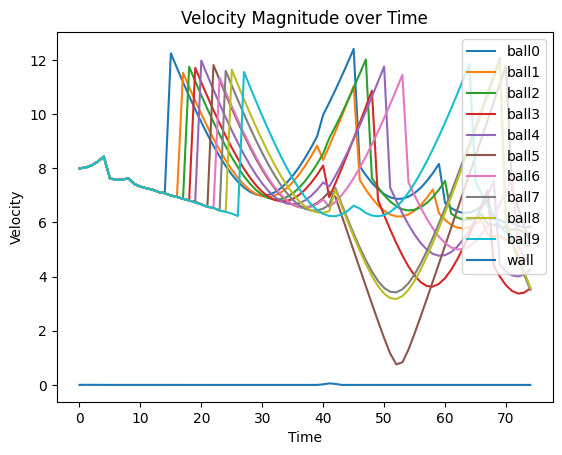

In [42]:
plot_velocity(linear_vel)

In [25]:
import copy 
linear_vel_mag = copy.deepcopy(linear_vel)
for body in linear_vel.keys(): 
    linear_vel_mag[body] = [] 
    for time in range(len(linear_vel[body])): 
        linear_vel_mag[body].append(np.linalg.norm(linear_vel[body][time]))

import numpy as np

def convert_seg_to_vel(pyb, velocities): 
    segm = pyb.segm 
    vels = segm.copy() 
    for time, frame in enumerate(vels): 
        for idx, pyb_id in np.ndenumerate(frame): 
            # map pyb_id to body_id to velocity 
            if pyb_id not in {0,-1}:
                body_id = pyb.pyb_id_to_body_id[pyb_id]
                magnitude = velocities[body_id][time]
                frame[idx] = magnitude  # Update the velocity for the specific id
            else: 
                frame[idx] = 0 

    return vels

vels = convert_seg_to_vel(pyb, linear_vel_mag)

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

def create_heatmap_gif(data, filename):
    # Create a list to store each frame of the GIF
    frames = []
    
    # Define the colormap
    cmap = plt.get_cmap('viridis')

    # Loop over each array in the data
    for array in data:
        # Create a figure and axes
        fig, ax = plt.subplots()
        
        # Create the heatmap for the current array
        heatmap = ax.imshow(array, cmap=cmap)
        
        # Remove the axis
        ax.axis('off')

        # Draw the figure and retrieve the pixel data
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')

        # Reshape the image to the correct dimensions
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        # Append the image to the frames list
        frames.append(image)
        
        # Close the figure to save memory
        plt.close(fig)

    # Save the frames as a GIF
    imageio.mimsave(filename, frames, 'GIF', duration = 0.1)


In [37]:
create_heatmap_gif(vels, 'scene_gifs/heatmat.gif')

## Segmentation

### Gif of object behind occluder 

In [1]:
import bayes3d.utils.pybullet_sim as pbs
import numpy as np

# scene of an object partially occluded by a wall 
scene = pbs.Scene() 
scene.set_downsampling(3)

path_to_obj = "../assets/sample_objs/diamond.obj" 
position = np.array([-4,6,2])
diamond = pbs.make_body_from_obj(path_to_obj, position, id="diamond")
diamond.set_color(np.array([0,1,0]))
diamond.set_scale(np.array([3,3,3]))
scene.add_body(diamond)

wall = pbs.make_box([0,0,2], [4,1,2], id = "wall")
wall.set_color(np.array([1,1,0]))
wall.set_occluder(True)
scene.add_body(wall)

scene.set_camera_position_target([0,-10,4], [0,0,0])

pyb = scene.simulate(12)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


pybullet build time: May 20 2022 19:44:17


added occluder


### Gif of object moving behind occluder 

In [15]:
# multirender 
# check if object is occlduer 
# if it isn't, add to mesh 

poses = pyb.get_body_poses() 

for body_id in scene.bodies: 
    body = scene.bodies[body_id]
    print(body.file_dir)
    print(len(poses[body_id]))

../assets/sample_objs/diamond.obj
4
../assets/sample_objs/cube.obj
4
